## 1. Импорты

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, classification_report)

## 2. Загрузка датасета Titanic

In [2]:
df = pd.read_csv('datasets/Titanic_Dataset.csv')
print(f"Размер данных: {df.shape}")
df.head()

Размер данных: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
print("Пропущенные значения:")
print(df.isnull().sum())

Пропущенные значения:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


## 3. Подготовка данных

In [5]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
target = 'Survived'

df_clean = df[features + [target]].copy()

df_clean['Age'].fillna(df_clean['Age'].median(), inplace=True)

df_clean['Fare'].fillna(df_clean['Fare'].median(), inplace=True)

df_clean['Sex'] = df_clean['Sex'].map({'male': 1, 'female': 0})

df_clean.dropna(inplace=True)

print(f"Данные после очистки: {df_clean.shape}")
df_clean.head()

Данные после очистки: (891, 7)


C:\Users\kalys\AppData\Local\Temp\ipykernel_21580\3969461580.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Age'].fillna(df_clean['Age'].median(), inplace=True)
C:\Users\kalys\AppData\Local\Temp\ipykernel_21580\3969461580.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,1,22.0,1,0,7.2500,0
1,1,0,38.0,1,0,71.2833,1
2,3,0,26.0,0,0,7.9250,1
3,1,0,35.0,1,0,53.1000,1
4,3,1,35.0,0,0,8.0500,0


In [6]:
print(df_clean['Survived'].value_counts())
print(f"\nПроцент выживших: {df_clean['Survived'].mean():.2%}")

Survived
0    549
1    342
Name: count, dtype: int64

Процент выживших: 38.38%


## 4. Train/Test Split

In [7]:
X = df_clean[features]
y = df_clean[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train: {X_train.shape[0]} примеров")
print(f"Test:  {X_test.shape[0]} примеров")

Train: 712 примеров
Test:  179 примеров


## 5. Обучение Decision Tree (без ограничений)

In [8]:
tree_unlimited = DecisionTreeClassifier(random_state=42)
tree_unlimited.fit(X_train, y_train)    

y_pred_train = tree_unlimited.predict(X_train)
y_pred_test = tree_unlimited.predict(X_test)

train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy:  {test_acc:.4f}")
print(f"\nГлубина дерева: {tree_unlimited.get_depth()}")
print(f"Количество листьев: {tree_unlimited.get_n_leaves()}")

Train Accuracy: 0.9789
Test Accuracy:  0.7542

Глубина дерева: 23
Количество листьев: 170


## 6. Визуализация дерева (ограниченная глубина для читаемости)

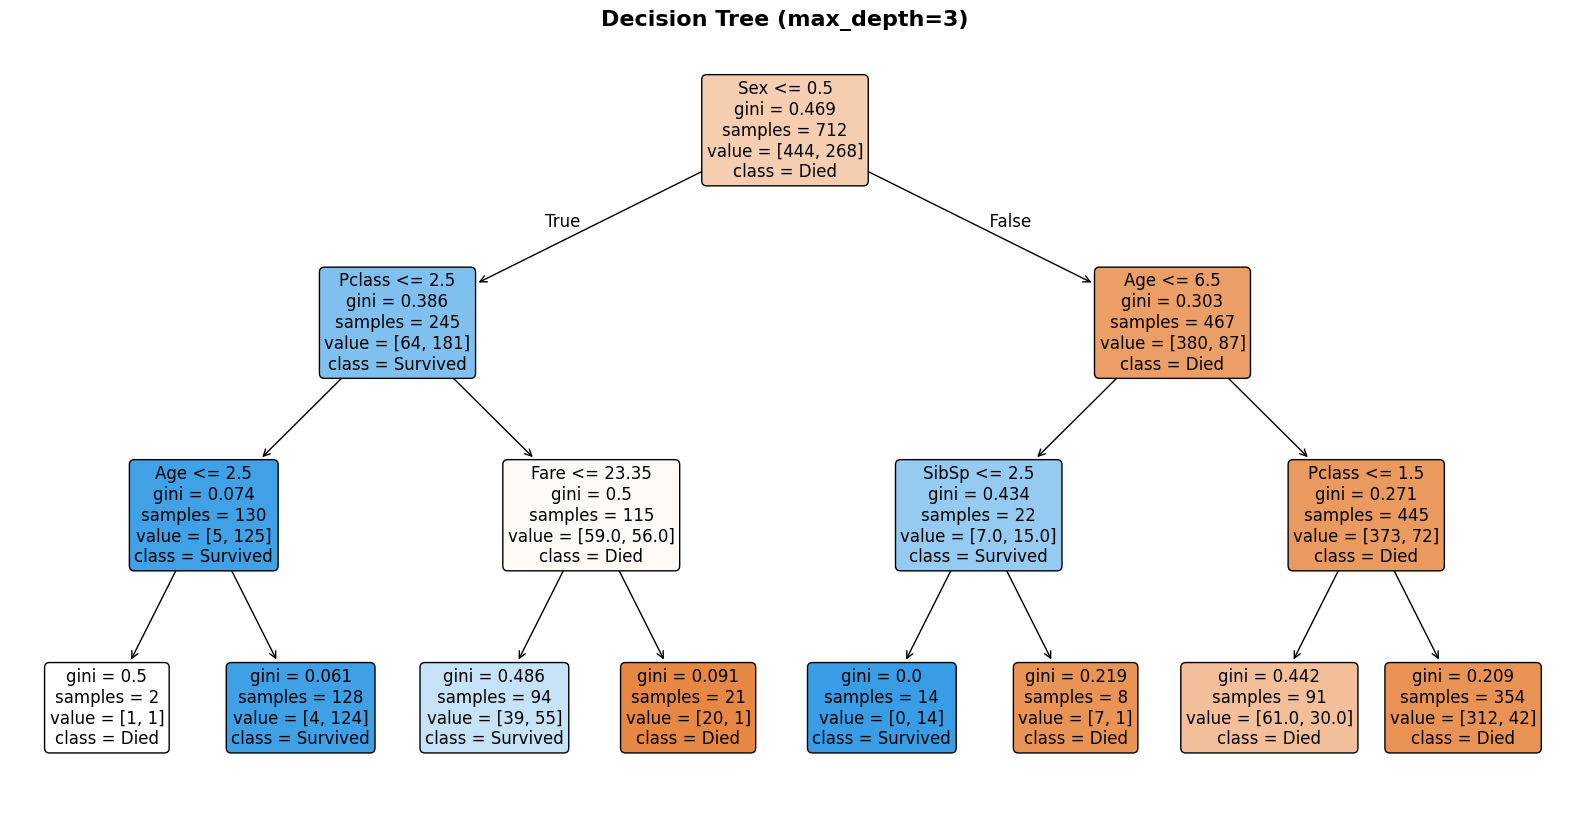

In [9]:
tree_viz = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_viz.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(tree_viz, 
          feature_names=features,
          class_names=['Died', 'Survived'],
          filled=True,
          rounded=True,
          fontsize=12)
plt.title('Decision Tree (max_depth=3)', fontsize=16, fontweight='bold')
plt.show()

**Как читать дерево:**
- **samples** - количество примеров в узле
- **value** - [количество класса 0, количество класса 1]
- **gini** - мера чистоты узла (0 = чистый узел)
- **class** - предсказываемый класс (большинство)

## 7. Feature Importance

Какие признаки наиболее важны для предсказания выживания?

  Feature  Importance
1     Sex    0.310280
5    Fare    0.290043
2     Age    0.194123
0  Pclass    0.118878
3   SibSp    0.054893
4   Parch    0.031783


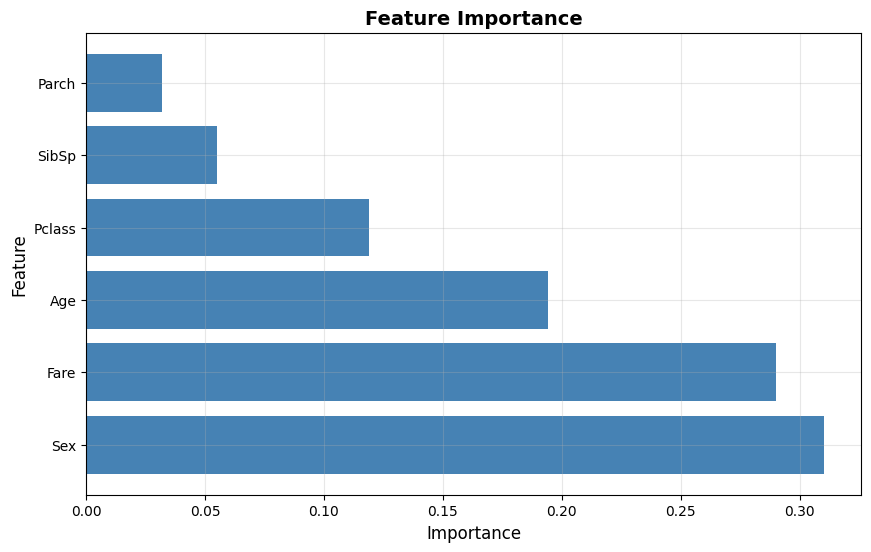

In [10]:
importances = tree_unlimited.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values('Importance', ascending=False)

print(feature_importance_df)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='steelblue')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Feature Importance', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.show()

## 8. Влияние max_depth на производительность

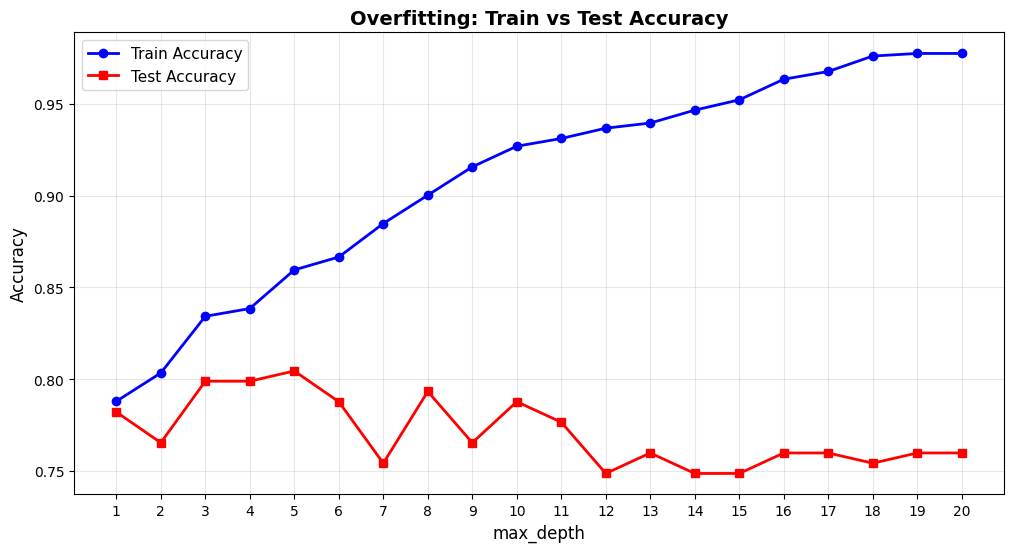


Лучший max_depth: 5
Test Accuracy: 0.8045


In [11]:
depths = range(1, 21)
train_scores = []
test_scores = []

for depth in depths:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree.fit(X_train, y_train)
    
    train_scores.append(accuracy_score(y_train, tree.predict(X_train)))
    test_scores.append(accuracy_score(y_test, tree.predict(X_test)))

plt.figure(figsize=(12, 6))
plt.plot(depths, train_scores, marker='o', label='Train Accuracy', linewidth=2, color='blue')
plt.plot(depths, test_scores, marker='s', label='Test Accuracy', linewidth=2, color='red')
plt.xlabel('max_depth', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Overfitting: Train vs Test Accuracy', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.xticks(depths)
plt.show()

best_depth = depths[np.argmax(test_scores)]
print(f"\nЛучший max_depth: {best_depth}")
print(f"Test Accuracy: {max(test_scores):.4f}")

## 9. Оптимальная модель с max_depth

In [12]:
tree_optimal = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
tree_optimal.fit(X_train, y_train)

y_pred_optimal = tree_optimal.predict(X_test)

print(f"Accuracy:  {accuracy_score(y_test, y_pred_optimal):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_optimal):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_optimal):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred_optimal):.4f}")

Accuracy:  0.8045
Precision: 0.8305
Recall:    0.6622
F1-Score:  0.7368


## 10. Confusion Matrix

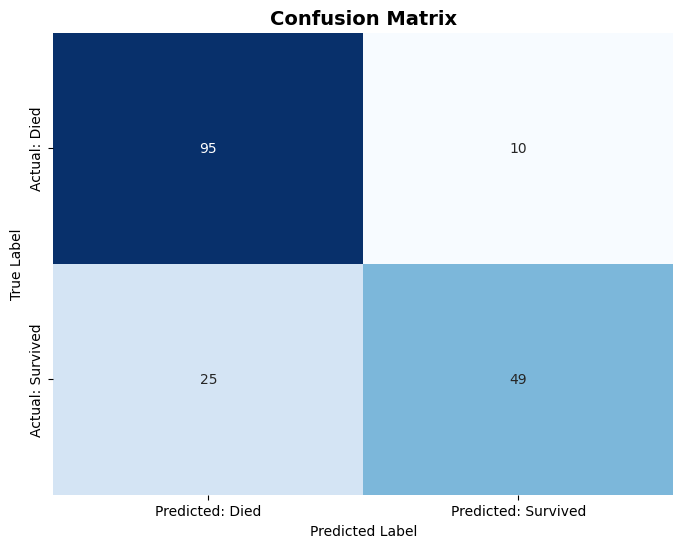

In [13]:
cm = confusion_matrix(y_test, y_pred_optimal)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted: Died', 'Predicted: Survived'],
            yticklabels=['Actual: Died', 'Actual: Survived'])
plt.title('Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

---

# Задание (Попробовать на другом наборе данных)

1. Попробовать разные значения `max_depth` (от 2 до 10) и найти оптимальное
2. Визуализировать дерево с глубиной 4-5 для лучшего понимания
3. Проанализировать, какие признаки самые важные для предсказания
4. Попробовать улучшить модель, изменив параметр `min_samples_leaf` (например: 5, 10, 20)